# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [198]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from pprint import pprint

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_study_data = pd. merge(mouse_metadata,study_results, how='outer',on='Mouse ID')


# Display the data table for preview
print(combined_mouse_study_data)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [199]:
# Checking the number of mice.
count = len(pd.unique(combined_mouse_study_data['Mouse ID']))
  
print(count)        

249


In [200]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
listdupind = []

duplicaterows = combined_mouse_study_data[combined_mouse_study_data.duplicated(["Mouse ID","Timepoint"])]

listdupind = list(duplicaterows.index.values)

print(duplicaterows)
len(duplicaterows)
# print(listdupind)




    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


5

In [201]:
# Optional: Get all the data for the duplicate mouse ID. 
dupmouseid = duplicaterows.at[listdupind[1],"Mouse ID"]
print(dupmouseid)

dupmouse = combined_mouse_study_data.loc[combined_mouse_study_data['Mouse ID']==dupmouseid]
print(dupmouse)



g989
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26  

In [202]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined = combined_mouse_study_data.drop(combined_mouse_study_data.loc[combined_mouse_study_data['Mouse ID']==dupmouseid].index)
print(clean_combined)


     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [203]:
# Checking the number of mice in the clean DataFrame.
count = len(pd.unique(clean_combined['Mouse ID']))
  
print(count)        

248


## Summary Statistics

In [204]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

meancleantumvol = clean_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

# print(meancleantumvol)

mediancleantumvol = clean_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

# print(mediancleantumvol)

varcleantumvol = clean_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

# print(varcleantumvol)

stddevcleantumvol = clean_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

# print(stddevcleantumvol)

semcleantumvol = clean_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# print(semcleantumvol)

# tumorvolbyregimen = pd.merge(meancleantumvol,mediancleantumvol,how='outer',on='Drug Regimen',suffixes="mean","median")
# tumorvolbyregimen = pd.merge(tumorvolbyregimen,varcleantumvol,how='outer',on='Drug Regimen',suffixes=None,'variance')
# tumorvolbyregimen = pd.merge(tumorvolbyregimen,stddevcleantumvol,how='outer',on='Drug Regimen',suffixes=None,'Standard Deviation')
# tumorvolbyregimen = pd.merge(tumorvolbyregimen,semcleantumvol,how='outer',on='Drug Regimen',suffixes=None,'Standard Error of the Mean')
tumorvolbyregimen = pd.merge(meancleantumvol,mediancleantumvol,how='outer',on='Drug Regimen')
tumorvolbyregimen = pd.merge(tumorvolbyregimen,varcleantumvol,how='left',on='Drug Regimen')
tumorvolbyregimen = pd.merge(tumorvolbyregimen,stddevcleantumvol,how='left',on='Drug Regimen')
tumorvolbyregimen = pd.merge(tumorvolbyregimen,semcleantumvol,how='left',on='Drug Regimen')
tumorvolbyregimen.columns = ["Mean of Tumor Volume (mm3)","Median of Tumor Volume (mm3)","Variance of Tumor Volume (mm3)","Standard Deviation of Tumor Volume (mm3)", "Standard Error of Mean of Tumor Volume (mm3)"]
tumorvolbyregimen.columns = ["Mean","Median","Var","StDev", "SEM"]
pprint(tumorvolbyregimen)



                   Mean     Median        Var     StDev       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [205]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
clean_combined.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})




Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'No. of Timepoints Recorded')

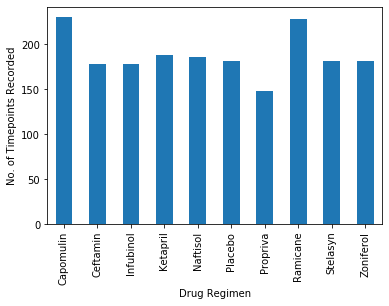

In [206]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_count_by_drug = clean_combined.groupby('Drug Regimen')['Timepoint'].count()

# x_axis = np.arange(len(clean_combined['Drug Regimen'].unique()))
x_axis = np.arange(len(mice_count_by_drug))

ax = mice_count_by_drug.plot.bar(x=x_axis, y=mice_count_by_drug, rot=90)
ax.set_ylabel("No. of Timepoints Recorded")


Text(0, 0.5, 'No. of Timepoints Recorded')

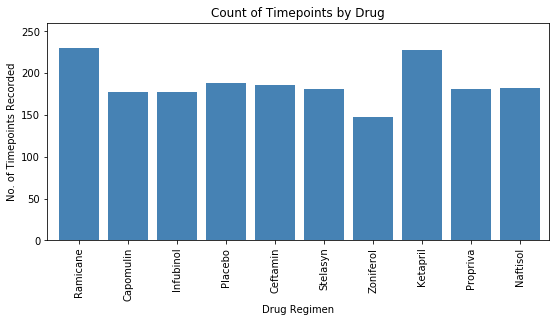

In [207]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mice_count_by_drug = clean_combined.groupby('Drug Regimen')['Timepoint'].count()

x_axis = np.arange(len(clean_combined['Drug Regimen'].unique()))
tick_locations = [value+0.4 for value in x_axis]


plt.figure(figsize=(x_axis[-1],4))
plt.bar(x_axis, mice_count_by_drug,color='steelblue',alpha=1.0,align="edge")
plt.xticks(tick_locations,clean_combined['Drug Regimen'].unique(), rotation="vertical")

# Set x and y limits
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(mice_count_by_drug)+30)

# Set a Title and labels
plt.title("Count of Timepoints by Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("No. of Timepoints Recorded")

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64


Text(0, 0.5, 'Sex')

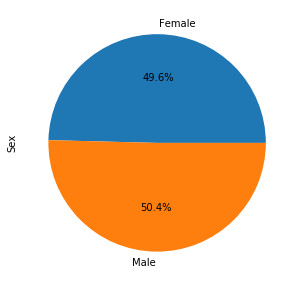

In [216]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_count_by_sex = clean_combined.groupby('Sex')['Mouse ID'].nunique()

print(mice_count_by_sex)

plot = mice_count_by_sex.plot.pie(y=mice_count_by_sex, autopct='%1.1f%%',figsize=(5,5))
plt.ylabel("Sex")



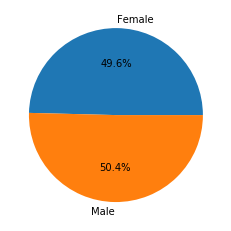

In [228]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_count_by_sex, labels=["Female","Male"], autopct="%1.1f%%")
plt.ylabel=("Sex")

##### YLABEL NOT SHOWING UP ######


## Quartiles, Outliers and Boxplots

In [271]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

final_tumor_size = clean_combined.groupby('Mouse ID')['Timepoint'].max()
#print(final_tumor_size)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_by_mouse = pd.merge(clean_combined,final_tumor_size, how='inner', left_on=['Mouse ID','Timepoint'], right_on=['Mouse ID','Timepoint'])

#print(tumor_by_mouse)

### Groupby including selected treatment regimens:
chosen_drug = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

chosen_drug_frame = tumor_by_mouse[tumor_by_mouse['Drug Regimen'].isin(chosen_drug)]

print(chosen_drug_frame)

chosen_by_drug = tumor_by_mouse.groupby('Drug Regimen')### Need to Finish ###

#print(chosen_by_drug)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0       k403     Ramicane    Male          21          16         45   
1       s185    Capomulin  Female           3          17         45   
2       x401    Capomulin  Female          16          15         45   
3       m601    Capomulin    Male          22          17         45   
4       g791     Ramicane    Male          11          16         45   
..       ...          ...     ...         ...         ...        ...   
234     x822     Ceftamin    Male           3          29         45   
236     y163    Infubinol  Female          17          27         45   
240     y769     Ceftamin  Female           6          27         45   
241     y865     Ceftamin    Male          23          26         45   
245     z581    Infubinol  Female          24          25         45   

     Tumor Volume (mm3)  Metastatic Sites  
0             22.050126                 1  
1             23.343598                 1  
2  

In [211]:
# Put treatments into a list for for loop (and later for plot labels)
chosen_drug = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_final = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [212]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

In [213]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [214]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [215]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

